# Sesión 3: Álgebra Lineal y Cálculo numérico

$$ $$
$$ $$
$$ $$
$$ $$
$$ $$
$$ $$
  

#### Introducción a Python para Ingeniería
#### M. Rodríguez, 2020 - 2022

## Contenido del Notebook:

1. Álgebra Lineal en Numpy:
    1. Determinante y norma
    2. Producto vectorial
    3. Producto matricial
    4. Autovalor y autovector
    5. Carga de datos

2. Scipy:
    1. Estadística
    2. Optimización, ajuste de curva e interpolación
    3. Integración numérica
    4. Derivación numérica


## 1) Álgebra Lineal en Numpy:


Probaremos a continuación algunas de las funcionalidades de álgebra lineal disponibles en Numpy. Podemos obtener una lista del contenido acudiendo a la ayuda del paquete:

In [1]:
import numpy as np

>`help(np)`

El contenido de la librería de álgebra lineal está compuesto por:
- Álgebra lineal
  - Norma
  - Inversa
  - Pseudoinversa
  - Determinante
  - Mínimos Cuadrados
  - Sistema lineal
  
- Autovalores y Autovectores
- Descomposición matricial
  - SVD
  - QR
  - Cholesky
- Tensores

Para ejemplificar el uso de esta librería, vamos a declarar una matriz:

In [2]:
Matriz = np.array([[1,2], [3,4]])

Una matriz se puede definir como tipo `matriz` en lugar de tipo `array`, por practicidad seguiremos como `array`.

Ahora, con la matriz definida, podemos calcular su determinante:

In [3]:
np.linalg.det(Matriz)

-2.0000000000000004

O su descomposición de Cholesky (descomposición en matrices reducidas):

In [4]:
np.linalg.cholesky(Matriz)

LinAlgError: Matrix is not positive definite

La matriz debe ser definida positiva... Podemos comprobarlo antes: Los autovalores de una matriz indican si es definida positiva en caso de que sean todos ellos positivos.


Para la matriz $  M=
  \left[ {\begin{array}{cc}
   2 & -1 & 1 \\
   -1 & 1 & 0 \\
   0 & 0 & 1\\
  \end{array} } \right]$ Empecemos por comprobar sus autovalores:

In [5]:
M=np.array([[2,-1,1], [-1,1,0], [0,0,1]])
print(M)

[[ 2 -1  1]
 [-1  1  0]
 [ 0  0  1]]


In [6]:
eigv = np.linalg.eigvals(M)
print('Autovalores obtenidos:', eigv)

print('Comprobación del signo de los autovalores. Todos positivos?', np.all(eigv>0))

Autovalores obtenidos: [2.61803399 0.38196601 1.        ]
Comprobación del signo de los autovalores. Todos positivos? True


Ahora sí, calculamos la descomposición de Cholesky:

In [7]:
M_Chlsk = np.linalg.cholesky(M)
print(M_Chlsk)

[[ 1.41421356  0.          0.        ]
 [-0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


Si queremos obtener una trapuesta se puede recurrir a cualquiera de estas opciones:

In [8]:
M_Chlsk.T

array([[ 1.41421356, -0.70710678,  0.        ],
       [ 0.        ,  0.70710678,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [9]:
np.transpose(M_Chlsk)

array([[ 1.41421356, -0.70710678,  0.        ],
       [ 0.        ,  0.70710678,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

Así, por ejemplo, si queremos recuperar la matriz original desde la descomposición de Cholesky:

In [12]:
M_Chlsk@M_Chlsk.T

array([[ 2., -1.,  0.],
       [-1.,  1.,  0.],
       [ 0.,  0.,  1.]])

De forma que el producto matricial puede obtener de manera sencilla con el operador `@`. La norma de la matriz puede obtenerse:

Si ahora definimos un vector $v=[1, 2, 2]$, podemos calcular el producto vectorial mediante:

Este producto matriz-vector, si las dimensiones son adecuadas, se puede obtener con el mismo operador `@`.

El producto escalar entre dos vectores se obtiene también con la misma función:

In [21]:
w=np.array([0,0,1])

In [22]:
v@w

2

Para el producto vectorial se debe acudir a `np.cross`:

Por último, el producto diádico entre ambos vectores nos producirá una matriz:

El cálculo de una matriz inversa puede obtenerse fácilmente también, si la matriz tiene inversa:

Si recuperamos la multiplicación de matriz y vector anterior:

$$  M=
  \left[ {\begin{array}{cc}
   2 & -1 & 1 \\
   -1 & 1 & 0 \\
   0 & 0 & 1\\
  \end{array} } \right]$$
  
  Y definimos un vector: 
  $$u=
  \left[ {\begin{array}{cc}
  1 & 4 & 0 \\ 
  \end{array} } \right]$$
  
  Podemos plantear el sistema lineal $M·x=u$, donde $x=[x_1, x_2, x_3]$ se pueden despejar:

Se obtiene, por tanto, una forma rápida de definir los pesos del sistema lineal a resolver (matriz $M$) y el valor al que se iguala el sistema de ecuaciones (vector $u$).

### Carga de datos con numpy

En la sesión 4 nos centraremos en otro aspecto de Numpy. Variando la temática y dejando atrás el álgebra lineal, se hará uso de la función `loadtxt`para importar datos de ficheros de numpy.

La importación de datos externos es siempre un utilidad a tener en cuenta, pues amenudo se dispone de datos recolectados por sensores o producidos por otras aplicaciones que hay que leer para poder luego operar con ellos.

Numpy, a diferencia de otros lenguajes de programación como Matlab, Fortran o C, incorpora una lectura estándar de datos externos.

## 2) Scipy:

Scipy contiene múltiples módulos. Lo habitual es cargar mediante un `import` sólo los módulos que se van a ejecutar, en lugar de cargar la librería completa como se ahce con `numpy`.

Téngase en cuenta que tanto *numpy* como *scipy* son librerías **numéricas**. Para cálculo simbólico se debe acudir a un CAS (*sympy*). 

## Scipy: Módulo de Estadística

Scipy ofrece una manera rápida de obtener datos estadísticos de una muestra. Por ejemplo, sobre los datos anteriores en `datos_arrancada`:

In [34]:
from scipy import stats as stats

Haciendo uso de la función `describe` se obtiene una vista rápida de los estadísticos del vector:

In [35]:
# E:
stats.describe(datos_arrancada[:,14])

DescribeResult(nobs=2040, minmax=(-9.097491, 202.840912), mean=42.098859289705885, variance=4468.234897348262, skewness=1.3328693206377589, kurtosis=0.36900293382759797)

In [36]:
# T4t-1:
stats.describe(datos_arrancada[:,9])

DescribeResult(nobs=2040, minmax=(325.406647, 1256.300903), mean=772.2958044269608, variance=65211.462777241206, skewness=-0.19507784297156774, kurtosis=-0.7239200043824576)

In [37]:
# T4t-2:
stats.describe(datos_arrancada[:,10])

DescribeResult(nobs=2040, minmax=(355.008972, 1312.776855), mean=735.0761074093137, variance=43430.31819288797, skewness=-0.1690647284687926, kurtosis=-0.023260359045802037)

El paquete de de estadística incluye tests y distribucione. Por ejemplo un test de la mediana es tan sencillo como:

In [38]:
stats.median_test(datos_arrancada[:,9], datos_arrancada[:,10])

(2.1656862745098038,
 0.1411216076253687,
 775.097229,
 array([[1044,  996],
        [ 996, 1044]], dtype=int64))

A parte de obtener máximos y mínimos, se pueden aplicar tests, (Chi2, Pearson, Normal, Mediana...), calcular momentos y curtosis, distribuciones de probabilidad...

In [39]:
print(stats.median_test(T4t1[1040:1170], T4t2[1040:1170]))
print(stats.scoreatpercentile(T4t1[1040:1170], per=75))
print(stats.scoreatpercentile(T4t2[1040:1170], per=75))

(9.615384615384615, 0.0019295404758470829, 779.453583, array([[52, 78],
       [78, 52]], dtype=int64))
791.70362875
793.01297


Text(0.5, 0, 'T [K]')

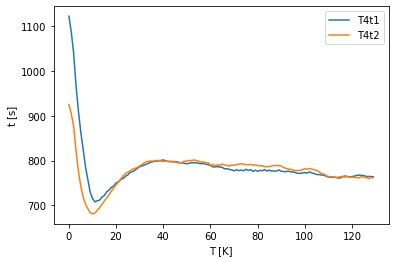

In [40]:
plt.figure()
plt.plot(T4t1[1040:1170])
plt.plot(T4t2[1040:1170])
plt.legend(['T4t1', 'T4t2'])
plt.ylabel("t [s]")
plt.xlabel("T [K]")

## Interpolación y Ajuste de datos:

Supongamos ahora que queremos diezmar los datos de T4t1 y T4t2. Para ello podemos usar la siguiente sintaxis:

In [41]:
a = np.arange(1,11,1)
print(a)
print(a[::3])

[ 1  2  3  4  5  6  7  8  9 10]
[ 1  4  7 10]


Por tanto, para T4t1 y T4t2:

Text(0.5, 0, 'T [K]')

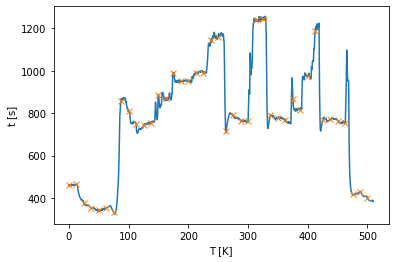

In [42]:
n=50
tiempo_d = tiempo[::n]
T4t1_d = T4t1[::n]
T4t2_d = T4t2[::n]
plt.figure()
plt.plot(tiempo, T4t1)
plt.plot(tiempo_d, T4t1_d, 'x')
plt.ylabel("t [s]")
plt.xlabel("T [K]")

Ahora, interpolando los nuevos datos con Splines:

In [43]:
from scipy import interpolate
T4t1_spline = interpolate.InterpolatedUnivariateSpline(tiempo_d, T4t1_d)
T4t1_remuestreado = T4t1_spline(tiempo)

Text(0.5, 0, 'T [K]')

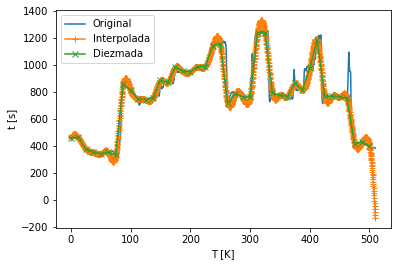

In [44]:
plt.figure()
plt.plot(tiempo, T4t1)
plt.plot(tiempo, T4t1_remuestreado, '+-')
plt.plot(tiempo_d, T4t1_d, 'x-')
plt.legend(['Original', 'Interpolada', 'Diezmada'])
plt.ylabel("t [s]")
plt.xlabel("T [K]")

Si aplicamos lo mismo para $T_{4t}^2$:

Text(0.5, 0, 'T [K]')

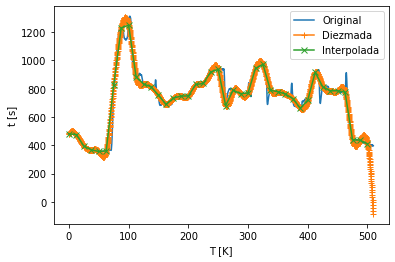

In [45]:
T4t2_spline = interpolate.InterpolatedUnivariateSpline(tiempo_d, T4t2_d)
T4t2_remuestreado = T4t2_spline(tiempo)
plt.figure()
plt.plot(tiempo, T4t2)
plt.plot(tiempo, T4t2_remuestreado, '+-')
plt.plot(tiempo_d, T4t2_d, 'x-')
plt.legend(['Original', 'Diezmada', 'Interpolada'])
plt.ylabel("t [s]")
plt.xlabel("T [K]")

Text(0.5, 0, 'T [K]')

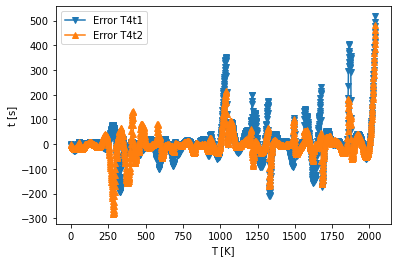

In [46]:
plt.figure()
plt.plot(T4t1 - T4t1_remuestreado, 'v-')
plt.plot(T4t2 - T4t2_remuestreado, '^-')
plt.legend(['Error T4t1', 'Error T4t2'])
plt.ylabel("t [s]")
plt.xlabel("T [K]")

Se produce Overfitting! Scipy y Numpy ofrecen muchos interpoladores según la necesidad de cada función. Probemos ahora a hacer un ajuste de datos mediante un ajuste de mínimos cuadrados no-lineales:



In [47]:
from scipy.optimize import curve_fit as cf

>`cf?`

De los datos de $T_{4t}^1$ seleccionaremos las muestras $T_{4t}^1[900:1031]$

In [48]:
T4t1_subsampl = T4t1[900:1031]
tiempo_subsampl = tiempo[900:1031]

Preparación del regresor: se hará uso de un regresor cúbico como el siguiente:

In [49]:
def regresor(x, a, b, c, d):
    poly = a + b*x + c*x*x + d*x*3
    return poly

Ahora, definiendo unos mínimos cuadrados no lineales con la regresión anterior sobre los datos de temperatura anteriores obtenemos:

In [50]:
valor_regresores, covarianza = cf(regresor, tiempo_subsampl, T4t1_subsampl)
print(valor_regresores)
print(covarianza)

[-2.15175599e+04  1.72156714e+04 -3.64607864e-01 -5.67791721e+03]
[[ 1.57069691e+06 -7.85995282e+06  2.69956382e+01  2.61563981e+06]
 [-7.85942191e+06 -2.46944666e+11 -1.27098454e+02  8.23149093e+10]
 [ 2.69956382e+01 -1.27107578e+02  4.64547563e-04  4.22944781e+01]
 [ 2.61546284e+06  8.23149093e+10  4.22914365e+01 -2.74383099e+10]]


Con el ajuste de mínimos cuadrados realizado, se pueden aplicar los pesos del regresor recién calculado y obtener la curva de ajuste:

In [51]:
T4t_ajustada = regresor(tiempo_subsampl, *valor_regresores)

La notación `*valor_regresores` sirve para desempaquetar los valores del `array` a cada una de las variables de `regresor(x, a, b, c, d)`.

Ahora, calculando la curva de ajuste y representándola:

Text(0.5, 0, 'T [K]')

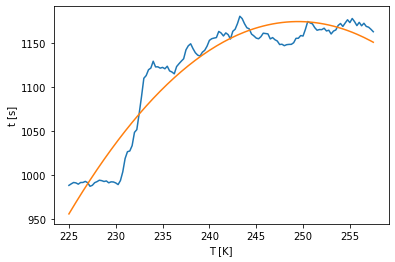

In [52]:
plt.figure()
plt.plot(tiempo_subsampl, T4t1_subsampl)
plt.plot(tiempo_subsampl, T4t_ajustada)
plt.ylabel("t [s]")
plt.xlabel("T [K]")

## Integrar con Scipy:

Integraremos una EDO sencilla tal que $$\frac{\delta y}{\delta t} = -y $$
$$ y_0 = 1 $$
$$ t_0 = 0 $$

Para ello la función a integrar se definirá como una función de python (`def`) con las variables independientes $t, y$:

In [53]:
from scipy.integrate import solve_ivp

def fun(t, y):
    return -y

t0 = np.array([0]) #es obligatorio
tf = np.array([10])#es obligatorio
y0 = np.array([1]) #es obligatorio

In [54]:
solucion = solve_ivp(fun, (t0, tf), y0)

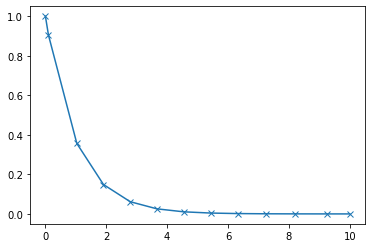

In [55]:
plt.figure()
plt.plot(solucion.t, solucion.y[0,:], 'x-')

Existen muchos más métodos de integración y derivación en Scipy. Dependiendo de la complejidad de la EDO/EDP se deben usar unos u otros.

La función `solve_ivp` es una implementación en Fortran de un integrador con múltiples esquemas numéricos incorporados. Por defecto se una RK4-5 (Runge Kutta orden 4) pero se pueden seleccionar otros métodos.

También se puede acudir directamente al método RK45 en `scipy.integrate.RK45`.

## Derivar con Scipy

La derivación numérica se puede acometer con scipy con la función `derivative`. En esta función se aplican unas diferencias finitas centradas de orden seleccionable por el usuario (por defecto orden 1).

In [56]:
from scipy.misc import derivative

Se define una función a derivar con `def`. Por ejemplo:

$$ f\left( x \right) = x^3 + x^2$$

La derivada en $x_1=1$ sería:

$$ \frac{\delta f}{\delta x} = 3x^2+2x \rightarrow \frac{\delta f}{\delta x}\bigg{\vert} _{x_1}=5$$

In [57]:
def f(x):
    return x**3 + x**2

derivada = derivative(f, 1.0, dx=1e-6)
print('Derivada en x1=1 : ', derivada)

Derivada en x1=1 :  4.999999999921734
